# Jobsheet 02 - Regression

**NIM**: 2041720132

**NAMA**: Maulana Bintang Irfansyah

**KELAS**: TI-3H

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Tujuan
1. Mahasiswa mampu menjelaskan konsep regresi
2. Mahasiswa mampu menerapkan konsep regresi untuk kasus prediksi data

## Kegiatan Praktikum

Kegiatan praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis prediksi. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan regresi.

### Persiapan Data

Pada tugas pertemuan 3 ini saya menggunakan Dataset "insurance.csv", sehingga pertanyaan-pertanyaan dari jobsheet ini saya sesuaikan dengan dataset saya.

*Source:* https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction

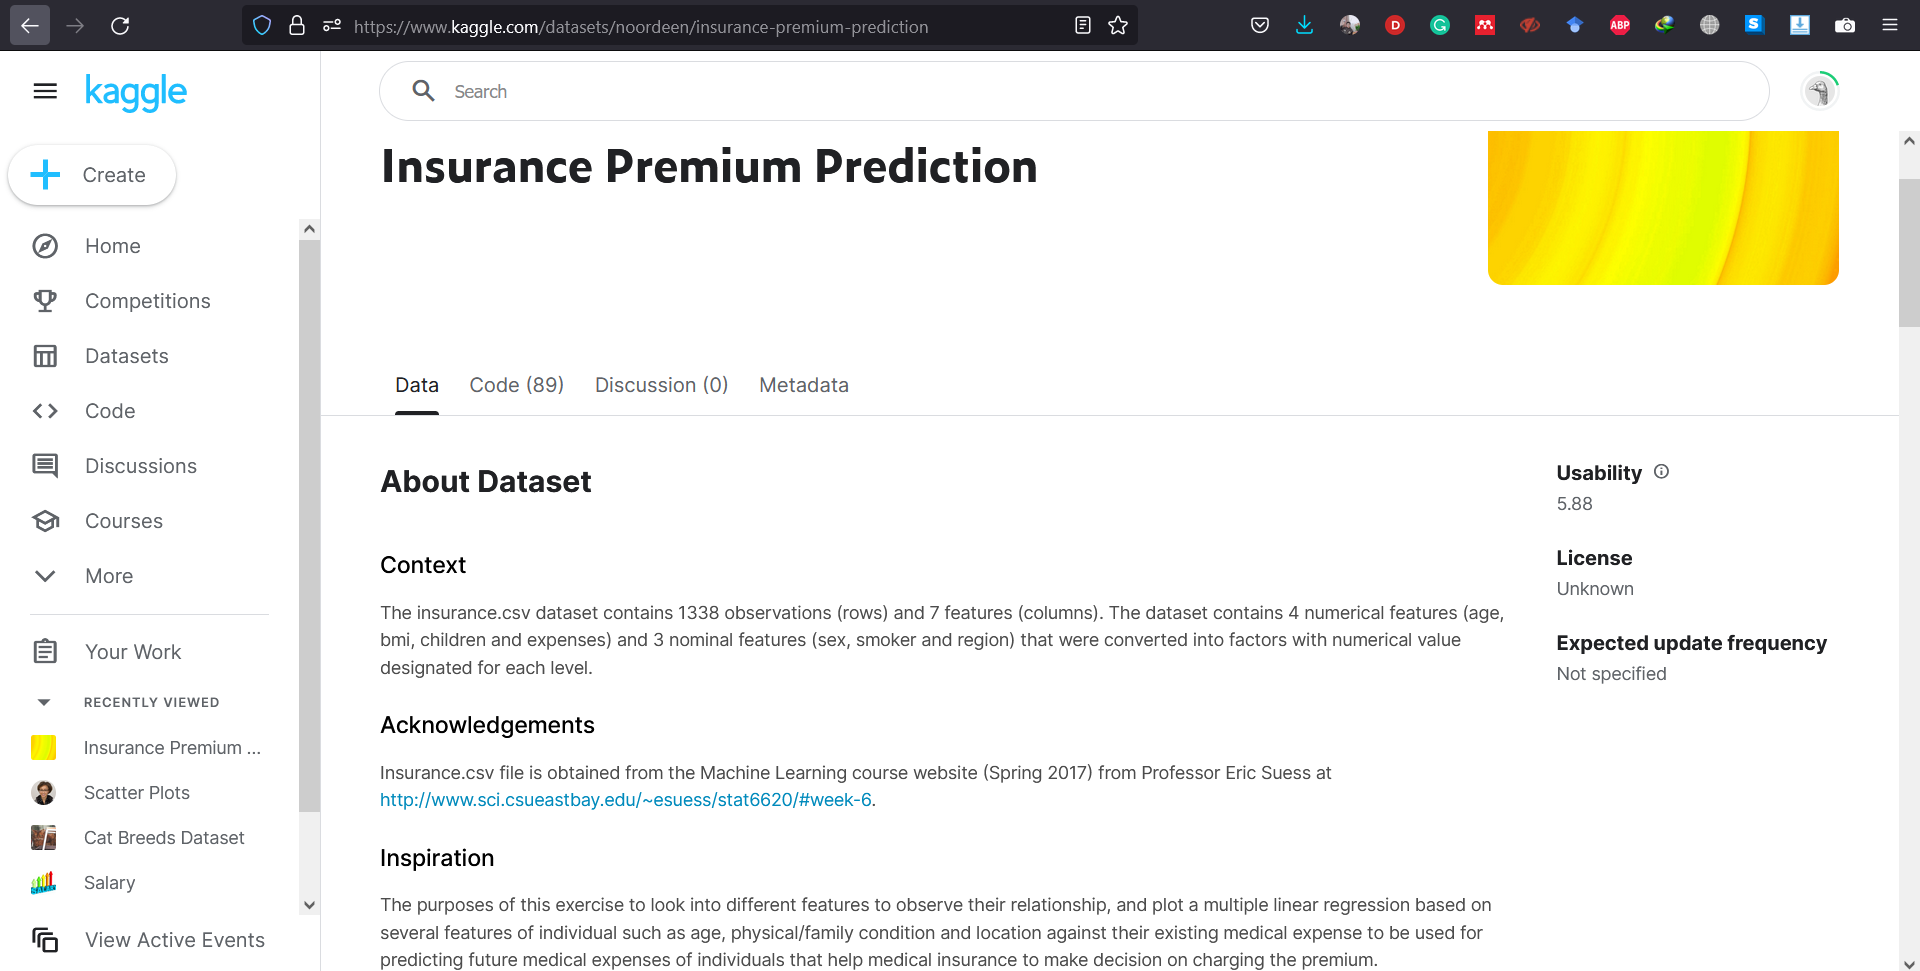

In [3]:
# import package
import numpy as np
import pandas as pd

In [4]:
# baca data
path = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Pertemuan 3/insurance.csv"
data = pd.read_csv(path)
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Visualisasi Data

In [7]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

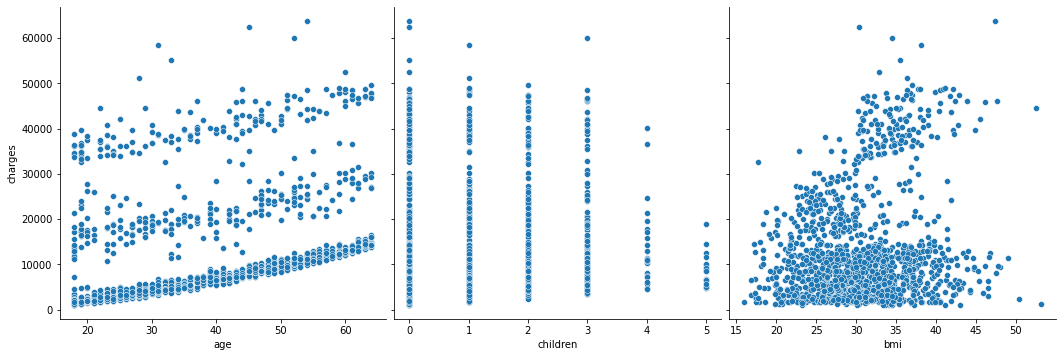

In [8]:
sns.pairplot(data, x_vars=['age', 'children', 'bmi'], y_vars='charges', height=5, aspect=1, kind='scatter')
plt.show()


output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

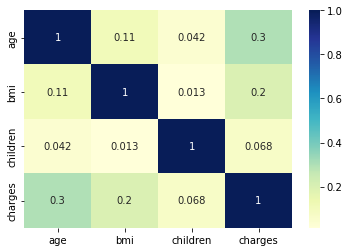

In [9]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa age memiliki korelasi yang paling kuat terhadap charges

### Regresi Linier

In [15]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
x = data[['age', 'bmi']]
y = data['charges']

In [22]:
xConst = sm.add_constant(x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [23]:
model = sm.OLS(y, xConst).fit()
predictions = model.predict(xConst)

In [64]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     88.60
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           7.39e-37
Time:                        11:57:39   Log-Likelihood:                -14394.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1335   BIC:                         2.881e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6424.8046   1744.091     -3.684      0.0

In [65]:
# Buat pemisahan data uji dan data latih
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)


In [66]:
# hasil training dataset
x_train
y_train

966     23967.38305
522      9866.30485
155      6948.70080
671      3943.59540
1173     6457.84340
           ...     
802      2103.08000
53      37742.57570
350     11830.60720
79       6571.02435
792      2731.91220
Name: charges, Length: 936, dtype: float64

In [67]:
# training model
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [68]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     64.17
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           7.75e-27
Time:                        11:57:51   Log-Likelihood:                -10069.
No. Observations:                 936   AIC:                         2.014e+04
Df Residuals:                     933   BIC:                         2.016e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6125.5673   2053.705     -2.983      0.003   -1.02e+04   -2095.151
age          251.4702     26.648      9.437      0.000     199.173     303.767
bmi          307.4737     60.399      5.091      0.000     188.940     426.008
==============================================================================
Omnibus:                      233.575   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              433.423
Skew:                           1.538   Prob(JB):                     7.64e-95
Kurtosis:                       4.283   Cond. No.                         283.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# fitting garis regresi
lr = sm.OLS(y_train, x_train_sm).fit()
lr.params

const   -6125.567315
age       251.470215
bmi       307.473663
dtype: float64

In [75]:
x_train=np.arange(0,len(x_train),1) 

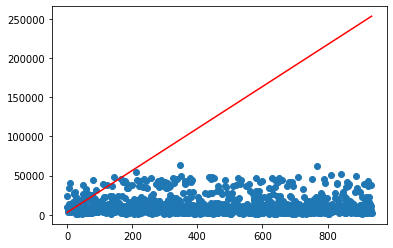

In [73]:
# visualisasi garis regresi
plt.scatter(x_train, y_train)
plt.plot(x_train, 2707.0518 + 332.9651 + 267.740141*x_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [53]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(x_train_sm)

res = (y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


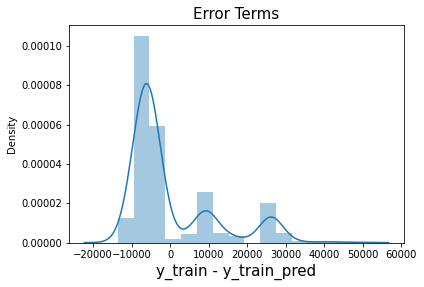

In [55]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

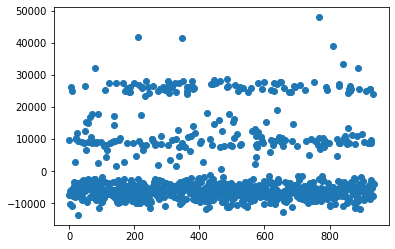

In [56]:
plt.scatter(x_train,res)
plt.show()

In [57]:
# prediksi pada data uji dan evaluasi model
x_test_sm = sm.add_constant(x_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(x_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


12     10235.341614
306     9371.124414
318    13439.231528
815     8576.958402
157     6141.546003
dtype: float64

In [58]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.10676050395208692

In [78]:
x_test=np.arange(0,len(x_test),1) 

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.097 sedangkan dari data testing adalah 0,072. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

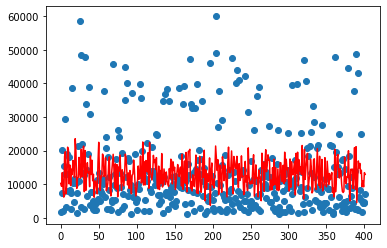

In [79]:
# visualisasi data
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, 'r')
plt.show()